<a href="https://colab.research.google.com/github/alliarnold/71200Project/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 3

## Step 0:

### **Load libraries and Github**

Loading main libraries and connect to GitHub from Google Colab.

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [2]:
!pip install -U scikit-learn==1.4
!pip install mglearn
import mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 52.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 2.2 MB/s eta 0:00:00


In [ ]:
! apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!git clone https://github.com/alliarnold/71200Project

fatal: destination path '71200Project' already exists and is not an empty directory.


## Step 1:

### **Load & Prepare Dataset**

Same tasks as performed in project 1 & 2. First I billed the compplete dataframe from the three separate cvs files in the Github repo.

In [ ]:
df1 = pd.read_csv('/content/71200Project/BK2-019-Temp-Monitor-pt1.csv', parse_dates=[1])

In [ ]:
df2 = pd.read_csv('/content/71200Project/BK2-019-Temp-Monitor-pt2.csv', parse_dates=[1])

In [ ]:
df3 = pd.read_csv('/content/71200Project/Locals.csv')

In [ ]:
df4 = pd.concat([df1, df2])

In [ ]:
#bringing into neighborhood names and their associated median household incomes
tempdf = df4.merge(df3, left_on='Latitude', right_on='Latitude')
tempdf['Longitude'] = tempdf['Longitude_x']
tempdf = tempdf.drop(["Longitude_y", 'Longitude_x'], axis=1)

In [ ]:
#making sure all airtemps have values instead of NA's. Already confirmed this was normally distributed in prior project before deciding to use mean instead of median.
tempdf['AirTemp_Mean'] = tempdf['AirTemp'].fillna(tempdf['AirTemp'].mean())

In [ ]:
#adding advisory column
conditions = [
    (tempdf['AirTemp_Mean'] < 80),
    (tempdf['AirTemp_Mean'] >= 80) & (tempdf['AirTemp_Mean'] < 90),
    (tempdf['AirTemp_Mean'] >= 90) & (tempdf['AirTemp_Mean'] < 103),
    (tempdf['AirTemp_Mean'] >= 103) & (tempdf['AirTemp_Mean'] < 124),
    (tempdf['AirTemp_Mean'] >= 124)
    ]

# create a list of the values we want to assign for each condition
values = ['Normal', 'Caution', 'Extreme_Caution', 'Danger', 'Extreme_Danger']

# create a new column and use np.select to assign values to it using our lists as arguments

tempdf['Advisory'] = np.select(conditions, values)

In [ ]:
#renaming old "Day" column to Date
tempdf['Date'] = tempdf["Day"]
tempdf.drop(["Day"], axis=1)

,AirTemp,Hour,Latitude,Install.Type,neighborhood,median_householdinc,Longitude,AirTemp_Mean,Advisory,Date
0,73.942167,7,40.666205,Street Tree,Brownsville,30733,-73.916910,73.942167,Normal,2019-08-09
1,76.666333,8,40.666205,Street Tree,Brownsville,30733,-73.916910,76.666333,Normal,2019-08-09
2,78.691333,9,40.666205,Street Tree,Brownsville,30733,-73.916910,78.691333,Normal,2019-08-09
3,81.472500,10,40.666205,Street Tree,Brownsville,30733,-73.916910,81.472500,Caution,2019-08-09
4,83.571667,11,40.666205,Street Tree,Brownsville,30733,-73.916910,83.571667,Caution,2019-08-09
...,...,...,...,...,...,...,...,...,...,...
477571,63.861167,16,40.663847,Street Tree,Brownsville,30733,-73.908308,63.861167,Normal,2019-10-15
477572,63.782667,17,40.663847,Street Tree,Brownsville,30733,-73.908308,63.782667,Normal,2019-10-15
477573,62.318667,18,40.663847,Street Tree,Brownsville,30733,-73.908308,62.318667,Normal,2019-10-15
477574,60.682333,19,40.663847,Street Tree,Brownsville,30733,-73.908308,60.682333,Normal,2019-10-15


In [ ]:
#pulling out month and day into their own columns
tempdf['Month'] = tempdf['Date'].dt.month
tempdf['Day'] = tempdf['Date'].dt.day

In [ ]:
#reorder final list of columns, drop "Date" for datatype reasons discovered in prof 2
tempdf2 = tempdf[["Month", "Day", "Hour", "AirTemp_Mean", "Advisory", "Latitude", "Longitude", "neighborhood","median_householdinc", "Install.Type" ]]
tempdf2.head()

,Month,Day,Hour,AirTemp_Mean,Advisory,Latitude,Longitude,neighborhood,median_householdinc,Install.Type
0,8,9,7,73.942167,Normal,40.666205,-73.91691,Brownsville,30733,Street Tree
1,8,9,8,76.666333,Normal,40.666205,-73.91691,Brownsville,30733,Street Tree
2,8,9,9,78.691333,Normal,40.666205,-73.91691,Brownsville,30733,Street Tree
3,8,9,10,81.472500,Caution,40.666205,-73.91691,Brownsville,30733,Street Tree
4,8,9,11,83.571667,Caution,40.666205,-73.91691,Brownsville,30733,Street Tree


Next, I separate out my features from my target variable, creating complete "features" and target" data sets.

In [ ]:
#Here I'm splitting my target from my features for later ease.
features = tempdf2.drop(['Advisory', 'AirTemp_Mean'], axis=1)
print(features)

        Month  Day  Hour   Latitude  Longitude neighborhood  \
0           8    9     7  40.666205 -73.916910  Brownsville   
1           8    9     8  40.666205 -73.916910  Brownsville   
2           8    9     9  40.666205 -73.916910  Brownsville   
3           8    9    10  40.666205 -73.916910  Brownsville   
4           8    9    11  40.666205 -73.916910  Brownsville   
...       ...  ...   ...        ...        ...          ...   
477571     10   15    16  40.663847 -73.908308  Brownsville   
477572     10   15    17  40.663847 -73.908308  Brownsville   
477573     10   15    18  40.663847 -73.908308  Brownsville   
477574     10   15    19  40.663847 -73.908308  Brownsville   
477575     10   15    20  40.663847 -73.908308  Brownsville   

        median_householdinc Install.Type  
0                     30733  Street Tree  
1                     30733  Street Tree  
2                     30733  Street Tree  
3                     30733  Street Tree  
4                     30733 

In [ ]:
target = tempdf[['Advisory', 'AirTemp_Mean']]
print(target)

       Advisory  AirTemp_Mean
0        Normal     73.942167
1        Normal     76.666333
2        Normal     78.691333
3       Caution     81.472500
4       Caution     83.571667
...         ...           ...
477571   Normal     63.861167
477572   Normal     63.782667
477573   Normal     62.318667
477574   Normal     60.682333
477575   Normal     60.260000

[477576 rows x 2 columns]


### **One Hot Encoding**

This time around I am also going create a version of the data with dummies for the categorical data--doing encoding for both features and targets.

In [ ]:
print("Original features:\n", list(features.columns), "\n")

Original features:
 ['Month', 'Day', 'Hour', 'Latitude', 'Longitude', 'neighborhood', 'median_householdinc', 'Install.Type'] 



In [ ]:
# one-hot encoding using get_dummies
data_dummies = pd.get_dummies(features, dtype=int)
#see results check that it is done correctly
print("Features after get_dummies:\n", list(data_dummies.columns))

Features after get_dummies:
 ['Month', 'Day', 'Hour', 'Latitude', 'Longitude', 'median_householdinc', 'neighborhood_Bed-Stuy', 'neighborhood_Brownsville', 'neighborhood_Carroll Gardens', 'neighborhood_East Flatbush', 'neighborhood_East New York', 'neighborhood_Flatbush', 'neighborhood_Gowanus', 'Install.Type_Light Pole', 'Install.Type_Street Tree']


### **LabelEncoder**

This encodes labels that were in the target data with values from 0 through nth class (0 through 3 here).

In [ ]:
## checking here to see if I'm going to need to stratify my data when I split for testing an training sets
target['Advisory'].value_counts()

Advisory
Normal             335605
Caution            115337
Extreme_Caution     26218
Danger                416
Name: count, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# 'Advisory' is the target
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target['Advisory'])

print(target_encoded)

[3 3 3 ... 3 3 3]


### **Testing & Training Data Split**

As seen above my target data on how safe it is outside (the advisory) is not evenly split between the overall data so I need to do a stratified testing and training dataset.

In [ ]:
X = data_dummies
y = target_encoded
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (477576, 15) y.shape: (477576,)


In [6]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=15, test_size=0.2)

In [ ]:
# Confirming that the stratification worked

def get_value_counts(array):
  unique, counts = np.unique(array, return_counts=True)
  total_count = counts.sum()
  percent = counts / total_count

  print("Unique Values:", unique)
  print("Counts:", counts)
  print("Proportion:", percent)

print("", 'Test Distribution')
get_value_counts(y_test)
print("", 'Training Distribution')
get_value_counts(y_train)

 Test Distribution
Unique Values: [0 1 2 3]
Counts: [23068    83  5244 67121]
Proportion: [0.24150928 0.00086896 0.0549018  0.70271996]
 Training Distribution
Unique Values: [0 1 2 3]
Counts: [ 92269    333  20974 268484]
Proportion: [0.24150395 0.00087159 0.05489714 0.70272732]


**Scale** the data.

In [7]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 2:

### **PCA for Feature Selection**

Two tasks in this section:

* Show how many features do you need to retain to capture 95% of the variance
* Evaluate whether this improves your best-performing model from Project 2

### **Part A**

Show number of features needed to explain 95% of variance.

In [4]:
from sklearn.decomposition import PCA

In [ ]:
# keep components to explain 95% of the variance
pca_unscaled = PCA(n_components=0.95)

# fit PCA model to data
pca_unscaled.fit(X_train)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(str(len(pca_unscaled.explained_variance_ratio_)) + ' features')
print(pca_unscaled.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
1 features
[0.99999983]


Text(0, 0.5, 'Principal components')

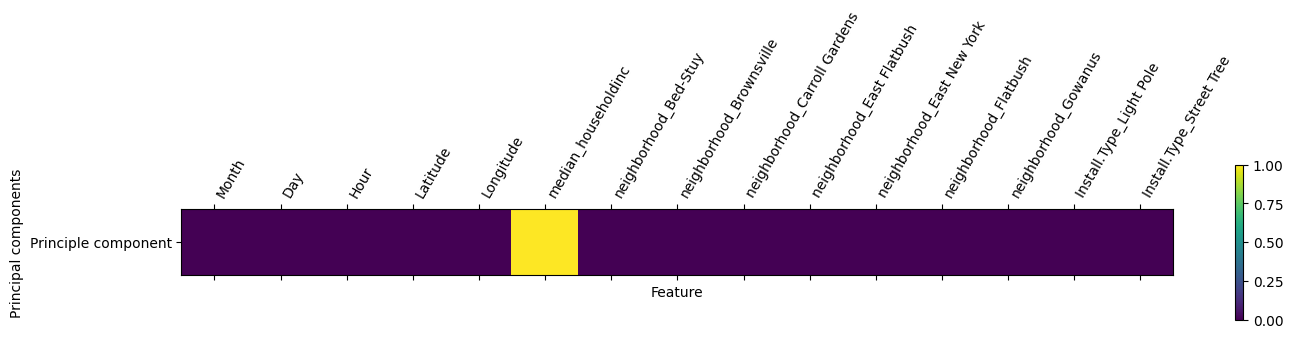

In [ ]:
# plot the principal components
plt.matshow(pca_unscaled.components_, cmap='viridis')
plt.yticks([0], ["Principle component"])
plt.colorbar()
plt.xticks(range(len(data_dummies.columns)),
           data_dummies.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

For unscaled data, it looks like I only need one feature component to retain 95% of the variance...

In [ ]:
# keep components to explain 95% of the variance using the scaled data this time
pca_scaled = PCA(n_components=0.95)

# fit PCA model to data
pca_scaled.fit(X_train_scaled)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(str(len(pca_scaled.explained_variance_ratio_)) + ' features')
print(pca_scaled.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
9 features
[0.20606875 0.16988842 0.11215363 0.09085131 0.09004879 0.07852795
 0.07151248 0.06961305 0.0666649 ]


Text(0, 0.5, 'Principal components')

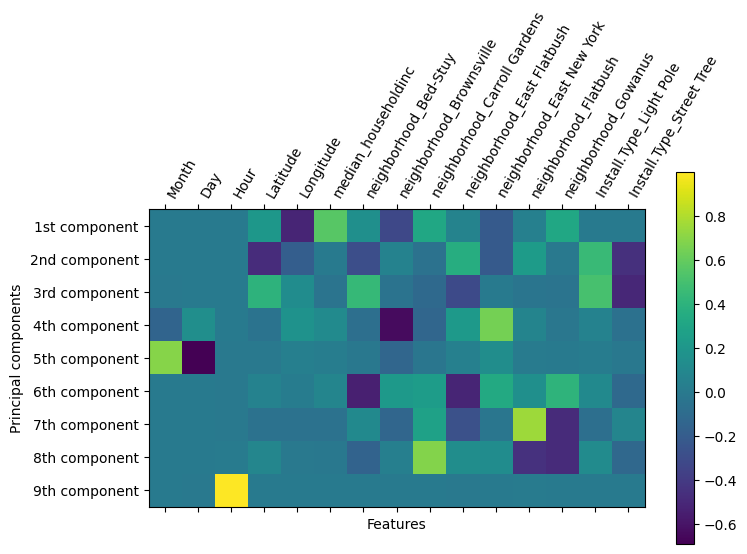

In [ ]:
# plot the principal components
plt.matshow(pca_scaled.components_, cmap='viridis')
plt.yticks([0, 1,2,3,4,5,6,7,8], ["1st component", "2nd component", "3rd component", "4th component", "5th component", "6th component", "7th component", "8th component", "9th component"])
plt.colorbar()
plt.xticks(range(len(data_dummies.columns)),
           data_dummies.columns, rotation=60, ha='left')
plt.xlabel("Features")
plt.ylabel("Principal components")

For scaled data, I need **nine** feature components to retain 95% of the variance--which makes much more sense with what I know about the dataset.

### **Part B**

Evaluate whether this improves your best-performing model from Project 2. In this case, the DecisionTreeClassification worked slightly better than the KNN models. I also ran a RandomForest model on the training data separately, and again got slightly lower results than the DecisionTreeClassifier.

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

tree = DecisionTreeClassifier(random_state=0)

In [ ]:
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
print(classification_report(y_test, tree.predict(X_test),
                            target_names=["class 0 CAUTION",
                                          "class 1 DANGER",
                                          "class 2 EX. CAUTION",
                                          "class 3 NORMAL"]))

Accuracy on training set: 1.000
Accuracy on test set: 0.939
                     precision    recall  f1-score   support

    class 0 CAUTION       0.88      0.87      0.88     23068
     class 1 DANGER       0.72      0.72      0.72        83
class 2 EX. CAUTION       0.78      0.79      0.79      5244
     class 3 NORMAL       0.97      0.97      0.97     67121

           accuracy                           0.94     95516
          macro avg       0.84      0.84      0.84     95516
       weighted avg       0.94      0.94      0.94     95516



Now I set up an instance of PCA with nine principal components of the scaled data, and run the DecisionTree on it.

In [ ]:
pca_9_scaled = PCA(n_components=9)

# fit on and transforming the training set and then transform the test set
X_train_pca_scaled = pca_9_scaled.fit_transform(X_train_scaled)
X_test_pca_scaled = pca_9_scaled.transform(X_test_scaled)

In [ ]:
tree.fit(X_train_pca_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train_pca_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test_pca_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.919


Now I set up an instance of PCA with one principal component of the unscaled data, and run the DecisionTree on it--just to be sure the scaled is the better direction.

In [ ]:
pca_2_unscaled = PCA(n_components=2)

# fit on and transforming the training set and then transform the test set
X_train_pca_unscaled = pca_2_unscaled.fit_transform(X_train)
X_test_pca_unscaled = pca_2_unscaled.transform(X_test)

In [ ]:
tree.fit(X_train_pca_unscaled, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train_pca_unscaled, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test_pca_unscaled, y_test)))


Accuracy on training set: 0.947
Accuracy on test set: 0.936


I was surprised to see it perform better on the unscaled data, but given that it was performing 100% on the training set with the scaled data, I wonder if the prior model is was overfitting. To be extra careful, I loop back to doing a KNN model and see how it does with the PCA approach.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
k = 7

knn = KNeighborsClassifier(n_neighbors=k)

In [ ]:
knn.fit(X_train, y_train)

print("Test set accuracy: {:.4f}".format(knn.score(X_test, y_test)))

Test set accuracy: 0.9384


In [ ]:
knn.fit(X_train_pca_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(knn.score(X_train_pca_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test_pca_scaled, y_test)))

Accuracy on training set: 0.823
Accuracy on test set: 0.754


In [ ]:
knn.fit(X_train_pca_unscaled, y_train)

print("Accuracy on training set: {:.3f}".format(knn.score(X_train_pca_unscaled, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test_pca_unscaled, y_test)))

Accuracy on training set: 0.947
Accuracy on test set: 0.935


Once again, the unscaled data performs better than the scaled data...

## Step 3:

### **3-types of clustering on your data and visualize the output of each both with and without PCA run on it first.**

* k-Means (use an elbow visualization to determine the optimal numbers of clusters)
* Aggolmerate/Hierarchical
* DBSCAN

### **Calculate both ARI and Silhouette Coefficient for all six of the combinations**

### Part A

##### **K-Means Clustering**

Starting with the **scaled** data.

In [9]:
# import library
from sklearn.cluster import KMeans

In [10]:
# instantiate an instance of k-Means
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_train_scaled)

NameError: name 'X_train_scaled' is not defined

In [ ]:
# get assignments (labels)
assignments=kmeans.labels_

In [ ]:
xs = X_train_scaled[:,0]
ys = X_train_scaled[:,1]

In [ ]:
centroids = kmeans.cluster_centers_

In [ ]:
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

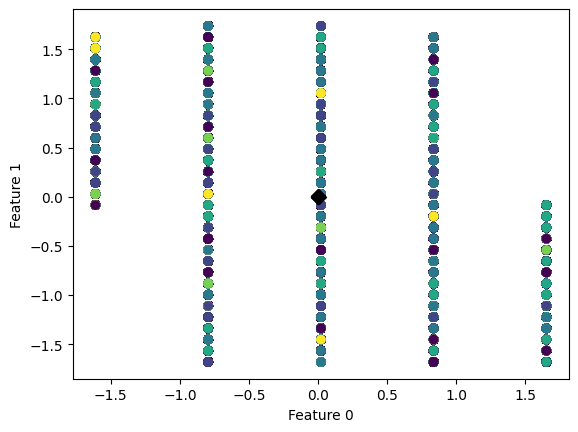

In [ ]:
plt.scatter(xs, ys, c=assignments)
plt.scatter(centroids_x, centroids_y, marker="D", s=50, c="black")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

Text(0, 0.5, 'Feature 1')

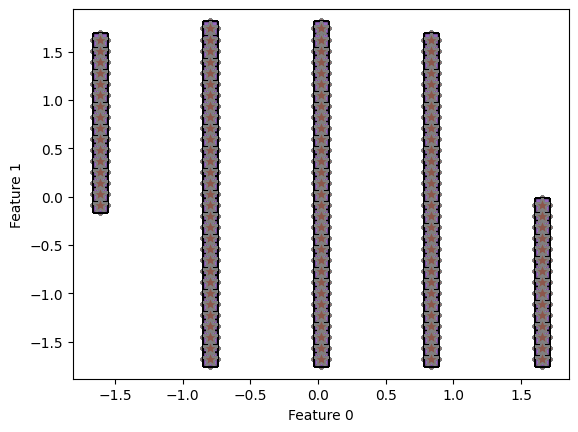

In [ ]:
# plot a scatter matrix of the results
mglearn.discrete_scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], assignments)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


Trying elbow on scaled...

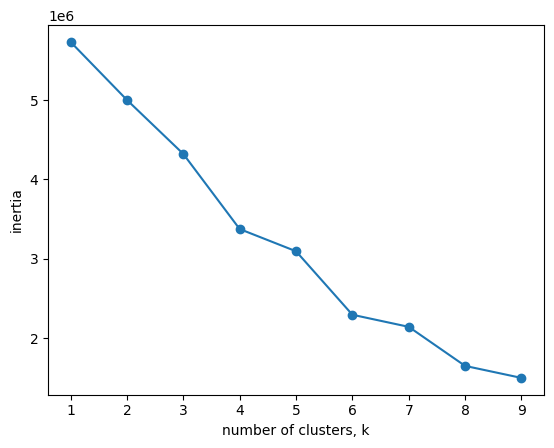

In [ ]:
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(X_train_scaled)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


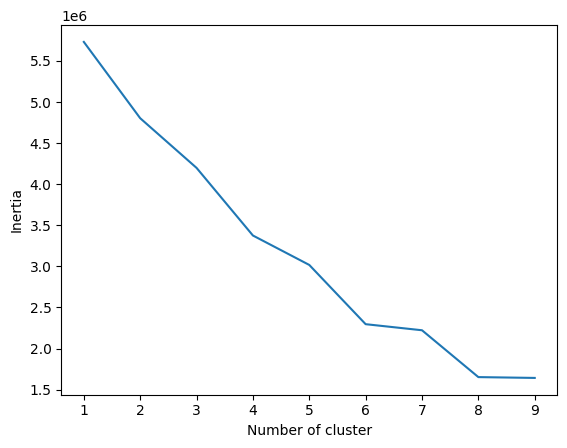

In [ ]:
# elbow visualization
inertiaVals = {}

for k in range(1, 10):
    kmeansK = KMeans(n_clusters=k, max_iter=1000).fit(X_train_scaled)
    inertiaVals[k] = kmeansK.inertia_
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

I've got some wobbly elbows here.... seems like 6 is probably the way to go on clustering for the original **scaled** data.

Next I just want to see how it looks on unscaled...

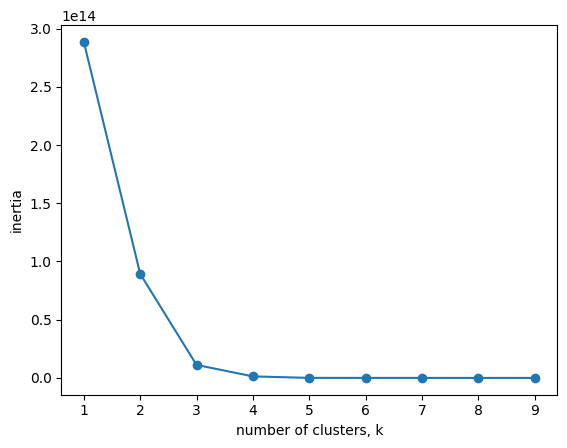

In [ ]:
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(X_train)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

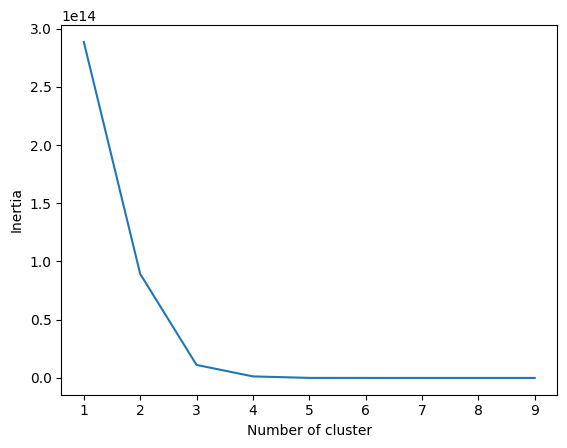

In [ ]:
# elbow visualization
inertiaVals = {}

for k in range(1, 10):
    kmeansK = KMeans(n_clusters=k, max_iter=1000).fit(X_train)
    inertiaVals[k] = kmeansK.inertia_
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

On the unscaled data it looks like three clusters is the way to go if I were using the unscaled data....

Next I'lll try doing in on the PCA scaled and unscaled...

Text(0, 0.5, 'Feature 1')

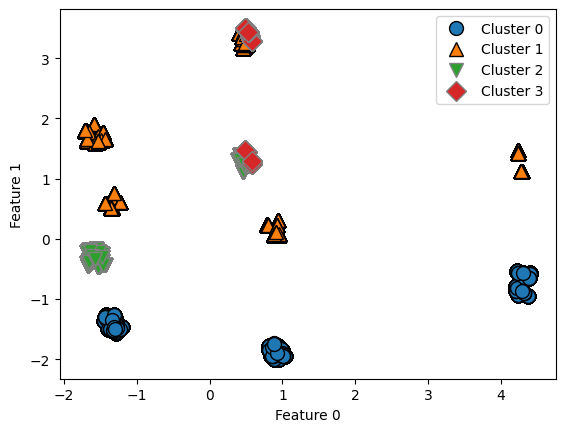

In [ ]:
# instantiate an instance of k-Means
kmeans_pca = KMeans(n_clusters=4)
kmeans_pca.fit(X_train_pca_scaled)

# get assignments (labels)
assignments_pca=kmeans_pca.labels_

# plot a scatter matrix of the results
mglearn.discrete_scatter(X_train_pca_scaled[:, 0], X_train_pca_scaled[:, 1], assignments_pca)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

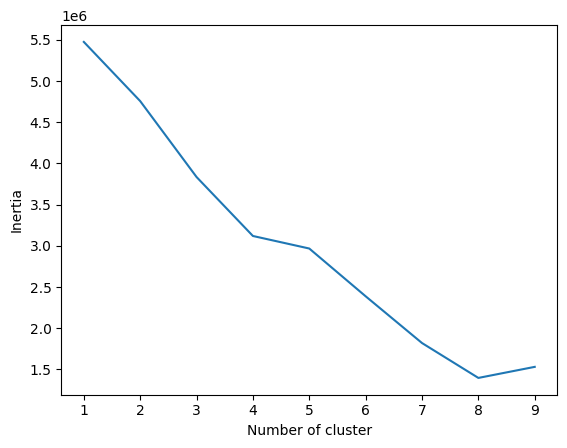

In [ ]:
# elbow visualization
inertiaVals = {}

for k in range(1, 10):
    kmeansK = KMeans(n_clusters=k, max_iter=1000).fit(X_train_pca_scaled)
    inertiaVals[k] = kmeansK.inertia_
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

Again... I got something weird going on with these elbows...

Text(0, 0.5, 'Feature 1')

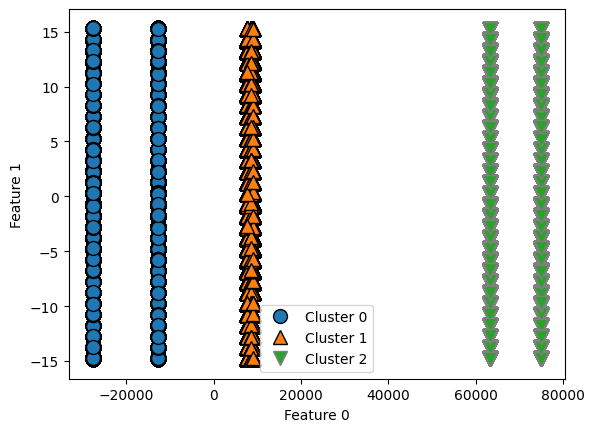

In [ ]:
# instantiate an instance of k-Means
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(X_train_pca_unscaled)

# get assignments (labels)
assignments_pca=kmeans_pca.labels_

# plot a scatter matrix of the results
mglearn.discrete_scatter(X_train_pca_unscaled[:, 0], X_train_pca_unscaled[:, 1], assignments_pca)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

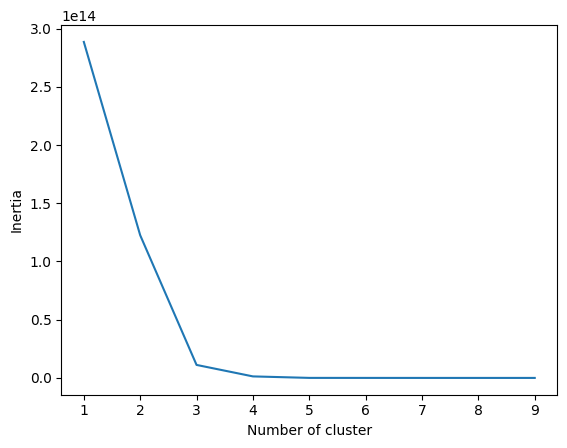

In [ ]:
# elbow visualization
inertiaVals = {}

for k in range(1, 10):
    kmeansK = KMeans(n_clusters=k, max_iter=1000).fit(X_train_pca_unscaled)
    inertiaVals[k] = kmeansK.inertia_
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

On the PCA data, it looks like 3 clusters is the way to go.

##### **Agglomerate/Hierarchical clustering**

**I could not get the following sections to run on my system RAM, even with premium GPUs. The code is there, but the results aren't loading.**

**Overall the results in the above section and the following indicate that my chosen dataset does not lend itself well to clustering techniques.**

Starting with original **scaled** again.

In [11]:
from sklearn.cluster import AgglomerativeClustering

In [12]:
agg = AgglomerativeClustering(n_clusters=7)

In [ ]:
assignment = agg.fit_predict(X_train_scaled)

In [ ]:
mglearn.discrete_scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Conducting the agglomerate/hierarchical clustering on **PCA scaled** data.

In [13]:
aggPCA = AgglomerativeClustering(n_clusters=3)

In [ ]:
assignment = aggPCA.fit_predict(X_train_pca_scaled)

In [ ]:
mglearn.discrete_scatter(X_train_pca_scaled[:, 0], X_train_pca_scaled[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

##### **DBSCAN**

Starting with original **scaled** again.

In [14]:
from sklearn.cluster import DBSCAN

In [15]:
dbscan = DBSCAN(min_samples=3,eps=0.5)

In [ ]:
clusters = dbscan.fit_predict(X_train_scaled)

In [ ]:
# plot the cluster assignments
mglearn.discrete_scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Moving on to **PCA scaled** data.

In [ ]:
dbscanPCA = DBSCAN(min_samples=3,eps=0.5)
clustersPCA = dbscanPCA.fit_predict(X_train_pca_scaled)

In [ ]:
# plot the cluster assignments
mglearn.discrete_scatter(X_train_pca_scaled[:, 0], X_train_pca_scaled[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Part B

**ARI and Silhouette Coefficient for all six of our combinations (three types of clustering, before and after PCA)**

##### **ARI**

Working with original, scaled data

In [16]:
from sklearn.metrics.cluster import adjusted_rand_score

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3), DBSCAN(min_samples=3)]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train_scaled))

# plot random assignment
axes[0].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y_train, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_train_scaled)
    ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y_train, clusters)))

Working with originl PCA scaled data

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3), DBSCAN(min_samples=3)]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train_pca_scaled))

# plot random assignment
axes[0].scatter(X_train_pca_scaled[:, 0], X_train_pca_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y_train, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_train_pca_scaled)
    ax.scatter(X_train_pca_scaled[:, 0], X_train_pca_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y_train, clusters)))

##### **Silhouette Coefficient**

Working with original, scaled data...

In [ ]:
from sklearn.metrics.cluster import silhouette_score

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train_scaled))

# plot random assignment
axes[0].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_train_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3), DBSCAN(min_samples=3)]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_train_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_train_scaled, clusters)))

Working with PCA scaled data...

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train_pca_scaled))

# plot random assignment
axes[0].scatter(X_train_pca_scaled[:, 0], X_train_pca_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_train_pca_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3), DBSCAN(min_samples=3)]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_train_pca_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_train_pca_scaled[:, 0], X_train_pca_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_train_pca_scaled, clusters)))

### Part C

Given that my dataset was too large to load those codes previously and that my PCA exploration yielded some odd results, I am conducting this exercise on the breast cancer data set as well.

In [17]:
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()

In [18]:
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    cancer_dataset.data, cancer_dataset.target, stratify=cancer_dataset.target, random_state=66,test_size=0.2)

In [19]:
scaler = StandardScaler()
X_train_cancer_scaled = scaler.fit_transform(X_train_cancer)
X_test_cancer_scaled = scaler.transform(X_test_cancer)

Here goes the PCA feataure selection....

In [20]:
# keep components to explain 95% of the variance
pca_cancer = PCA(n_components=0.95)

# fit PCA model to data
pca_cancer.fit(X_train_cancer_scaled)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(str(len(pca_cancer.explained_variance_ratio_)) + ' features')
print(pca_cancer.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
10 features
[0.44837054 0.18406119 0.09561047 0.06684428 0.05575205 0.03893997
 0.02298186 0.01514408 0.01315435 0.01135716]


10 features required to retain 95% of the variance on the breast cancer data set. Next step, I'll plot that.

Text(0, 0.5, 'Principal components')

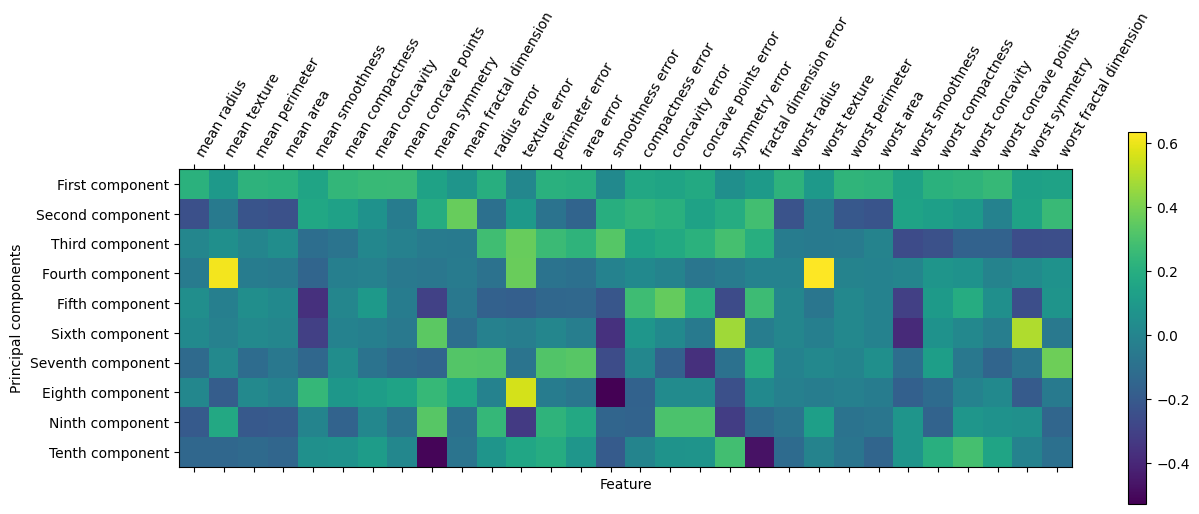

In [26]:
# plot the principal components
plt.matshow(pca_cancer.components_, cmap='viridis')
plt.yticks([0, 1, 2, 3, 4, 5, 6,7,8,9], ["First component", "Second component", "Third component", "Fourth component", "Fifth component", "Sixth component", "Seventh component", "Eighth component", "Ninth component", "Tenth component"])
plt.colorbar()
plt.xticks(range(len(cancer_dataset.feature_names)),
           cancer_dataset.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

Setting up the PCA for clustering...

In [27]:
pca_10 = PCA(n_components=10)

# fit on and transforming the training set and then transform the test set
X_train_cancer_pca = pca_10.fit_transform(X_train_cancer_scaled)
X_test_cancer_pca = pca_10.transform(X_test_cancer_scaled)

KNN time.... (non-PCA data)

Text(0, 0.5, 'Feature 1')

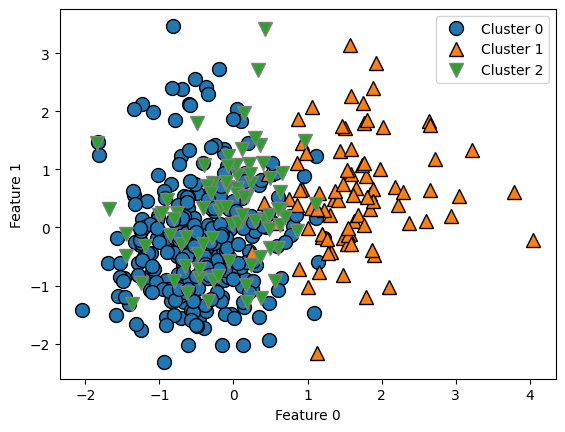

In [28]:
# instantiate an instance of k-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_cancer_scaled)

# get assignments (labels)
assignments=kmeans.labels_

# plot a scatter matrix of the results
mglearn.discrete_scatter(X_train_cancer_scaled[:, 0], X_train_cancer_scaled[:, 1], assignments)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

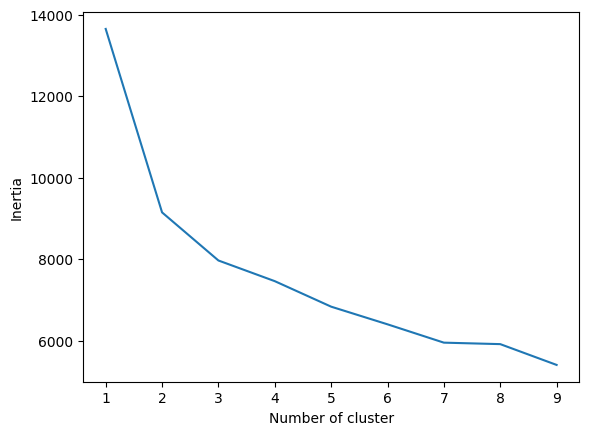

In [29]:
# elbow visualization
inertiaVals = {}

for k in range(1, 10):
    kmeansK = KMeans(n_clusters=k, max_iter=1000).fit(X_train_cancer_scaled)
    inertiaVals[k] = kmeansK.inertia_
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

KNN on PCA data....

Text(0, 0.5, 'Feature 1')

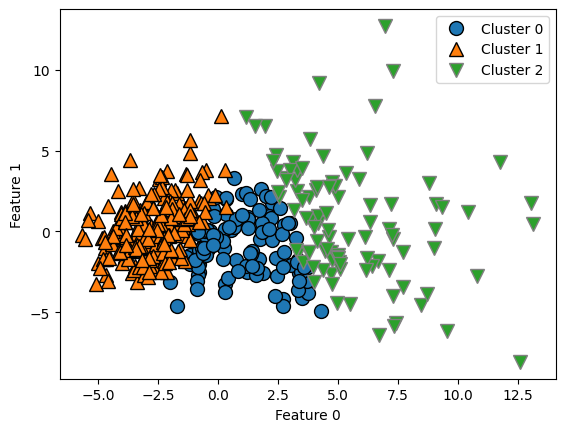

In [30]:
# instantiate an instance of k-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_cancer_pca)

# get assignments (labels)
assignments=kmeans.labels_

# plot a scatter matrix of the results
mglearn.discrete_scatter(X_train_cancer_pca[:, 0], X_train_cancer_pca[:, 1], assignments)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

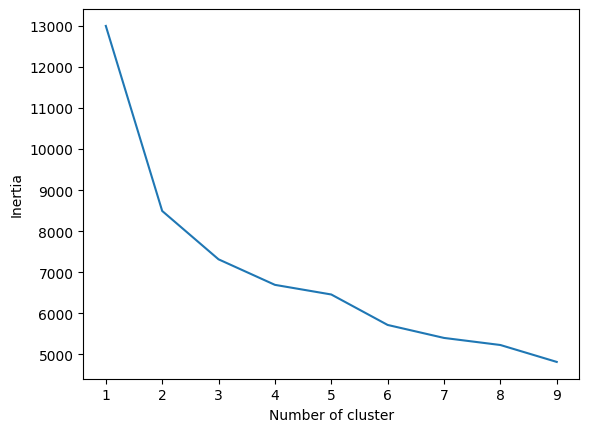

In [31]:
# elbow visualization
inertiaVals = {}

for k in range(1, 10):
    kmeansK = KMeans(n_clusters=k, max_iter=1000).fit(X_train_cancer_pca)
    inertiaVals[k] = kmeansK.inertia_
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

Time for agglomerate/hierarchical clustering. First doing it with non-PCA version of the data.

Text(0, 0.5, 'Feature 1')

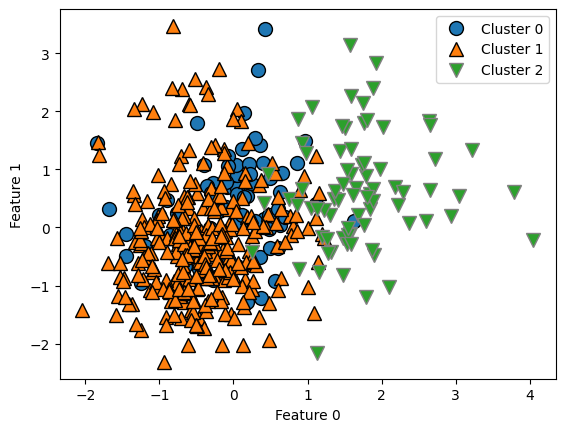

In [32]:
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X_train_cancer_scaled)

mglearn.discrete_scatter(X_train_cancer_scaled[:, 0], X_train_cancer_scaled[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Then trying it on the PCA data....

Text(0, 0.5, 'Feature 1')

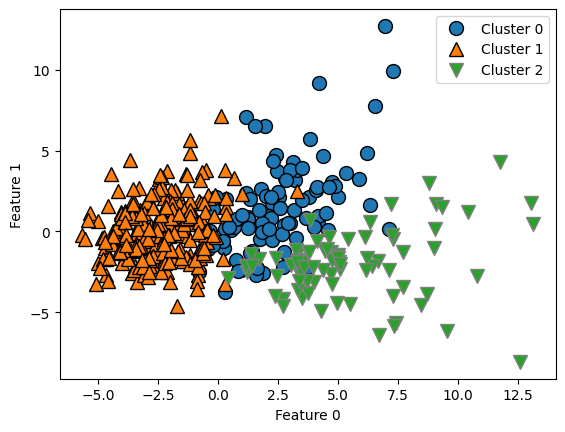

In [33]:
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X_train_cancer_pca)

mglearn.discrete_scatter(X_train_cancer_pca[:, 0], X_train_cancer_pca[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Now going on to the DBScan. Again, starting with the non-PCA/original scaled.

Text(0, 0.5, 'Feature 1')

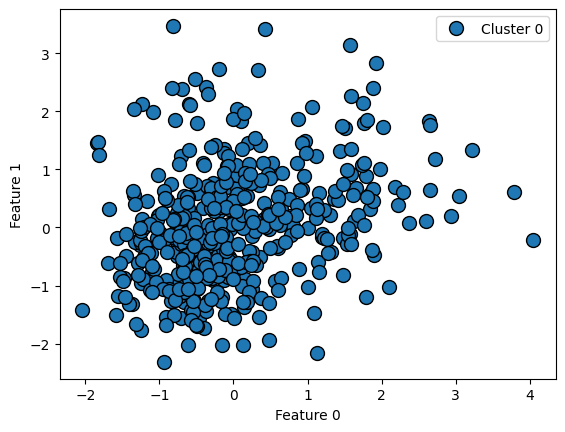

In [34]:
dbscan = DBSCAN(min_samples=2,eps=0.5)
clusters = dbscan.fit_predict(X_train_cancer_scaled)

# plot the cluster assignments
mglearn.discrete_scatter(X_train_cancer_scaled[:, 0], X_train_cancer_scaled[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Next up, PCA version

Text(0, 0.5, 'Feature 1')

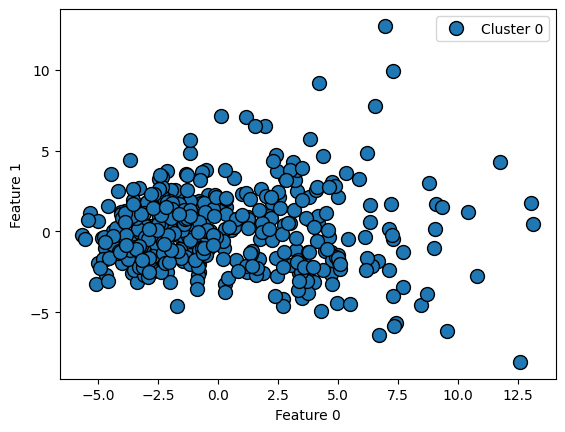

In [35]:
dbscan = DBSCAN(min_samples=2,eps=0.5)
clusters = dbscan.fit_predict(X_train_cancer_pca)

# plot the cluster assignments
mglearn.discrete_scatter(X_train_cancer_pca[:, 0], X_train_cancer_pca[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Now moving on to the ARI on the original scaled data.

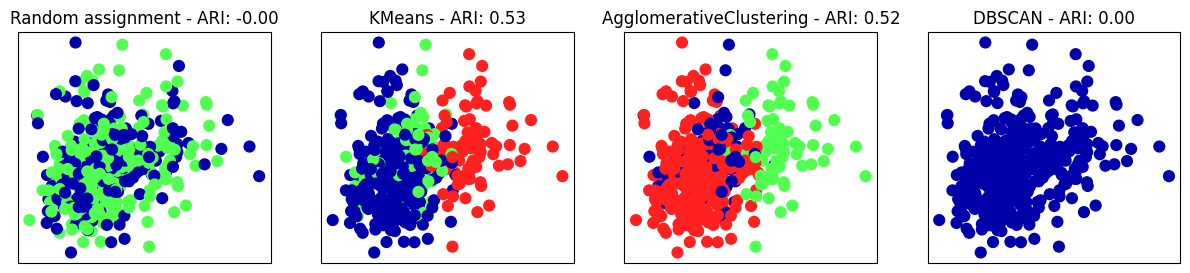

In [36]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3), DBSCAN(min_samples=2)]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train_cancer_scaled))

# plot random assignment
axes[0].scatter(X_train_cancer_scaled[:, 0], X_train_cancer_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y_train_cancer, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_train_cancer_scaled)
    ax.scatter(X_train_cancer_scaled[:, 0], X_train_cancer_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y_train_cancer, clusters)))

Ok, now ARI on the PCA data.

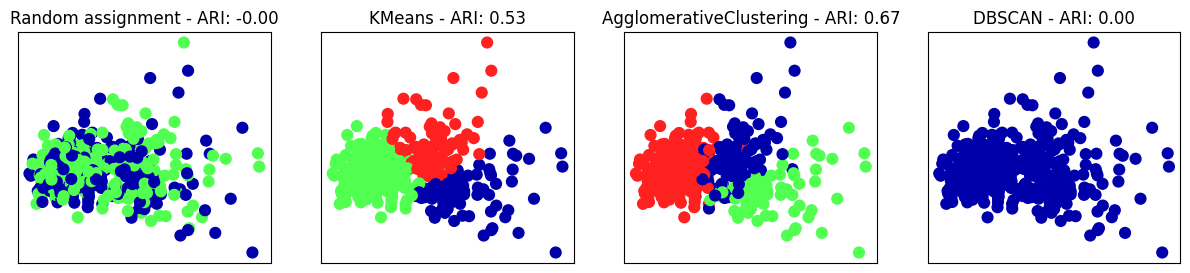

In [37]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3), DBSCAN(min_samples=2)]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train_cancer_pca))

# plot random assignment
axes[0].scatter(X_train_cancer_pca[:, 0], X_train_cancer_pca[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y_train_cancer, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_train_cancer_pca)
    ax.scatter(X_train_cancer_pca[:, 0], X_train_cancer_pca[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y_train_cancer, clusters)))

And, now the final bit. Silhouette coefficient on the original scaled data.

In [39]:
from sklearn.metrics.cluster import silhouette_score

<ipython-input-40-9ccb11cc8b14>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_train_cancer_scaled[:, 0], X_train_cancer_scaled[:, 1], cmap=mglearn.cm3,


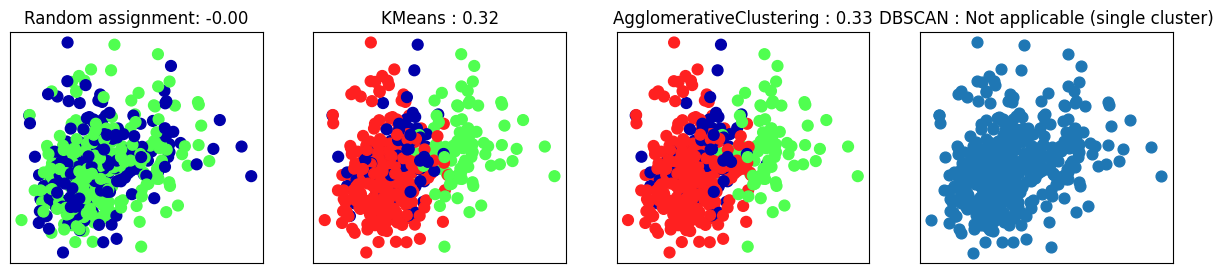

In [40]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train_cancer_scaled))

# plot random assignment
axes[0].scatter(X_train_cancer_scaled[:, 0], X_train_cancer_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_train_cancer_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3), DBSCAN(min_samples=2)]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_train_cancer_scaled)

    # Handle cases where only one cluster is identified
    if len(np.unique(clusters)) > 1:
        # plot the cluster assignments and cluster centers
        ax.scatter(X_train_cancer_scaled[:, 0], X_train_cancer_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
                   s=60)
        ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                          silhouette_score(X_train_cancer_scaled, clusters)))
    else:
        ax.scatter(X_train_cancer_scaled[:, 0], X_train_cancer_scaled[:, 1], cmap=mglearn.cm3,
                   s=60)
        ax.set_title("{} : Not applicable (single cluster)".format(algorithm.__class__.__name__))